<a href="https://colab.research.google.com/github/AlainRossier/datathon-20/blob/master/citadel_eda_isakov1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os

# from google.colab import drive
# drive.mount('/content/drive')
DIR = "//content//drive//My Drive//Citadel Datathon 2020//datasets_full"

filenames = glob(os.path.join(f"{DIR}//London//", "*.csv"))
# for f in filenames:
#   try:
#     pd.read_csv(f)
#   except UnicodeDecodeError:
#     print(f)
    
df_lst = [pd.read_csv(f, encoding = "unicode_escape") for f in filenames]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [48]:
file_base = [os.path.basename(f) for f in filenames]
print(file_base)
df_dict = {file_base[i]: df_lst[i] for i in range(len(file_base))}

['london_earnings_by_borough.csv', 'london_tickets_for_sale.csv', 'london_sports_participation.csv', 'UK_inflation.csv', 'london_ticket_sales.csv', 'london_economic_activity.csv', 'london_taxpayer_income.csv', 'london_underground_station_info.csv', 'UK_international-visits.csv', 'london_underground_activity.csv', 'london_infrastructure_spending.csv']


In [69]:
earnings = df_dict["london_earnings_by_borough.csv"].dropna()
earnings["identity"].value_counts()

Full-time    1663
Female       1658
Male         1651
Part-time     823
Part-Time     803
Name: identity, dtype: int64

In [72]:
for c in earnings.columns:
  print(f"---- {c} ----")
  print(earnings[c].value_counts())

---- year ----
2009    371
2018    370
2004    368
2013    368
2016    368
2010    368
2011    367
2008    367
2006    367
2012    366
2019    366
2014    366
2017    365
2015    365
2003    365
2005    364
2002    364
2007    363
Name: year, dtype: int64
---- area_code ----
G       144
F       144
00BB    144
00BC    144
00AD    144
00AE    144
00AT    144
00AH    144
924     144
00AR    144
00BF    144
00BG    144
00AQ    144
00AL    144
00AB    144
D       144
J       144
00AF    144
H       144
A       144
922     144
00BE    144
00BJ    144
00AS    144
K       144
00AM    144
926     144
00AJ    144
00AC    144
941     144
00AK    144
923     144
E       144
00BH    144
00AZ    144
00AY    144
B       144
00AP    143
00AN    142
00BA    142
00AX    142
00AG    142
00AU    141
00BD    140
00BK    139
00AW    129
00AA     10
Name: area_code, dtype: int64
---- area ----
North West                  144
Enfield                     144
South West                  144
Barnet             

In [84]:
earnings_cln = earnings.loc[earnings["area_code"] != "00AA", :] # City of London vs. just London (duplicate!)
earnings_cln.loc[earnings_cln["identity"] == "Part-Time", "identity"] = "Part-time"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


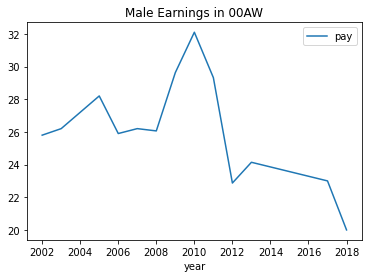

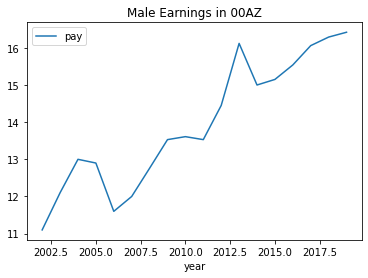

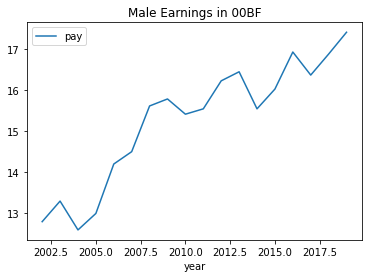

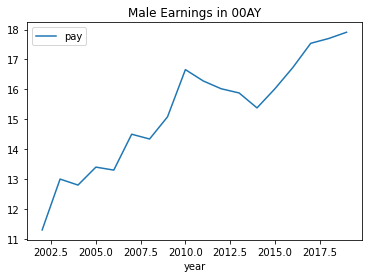

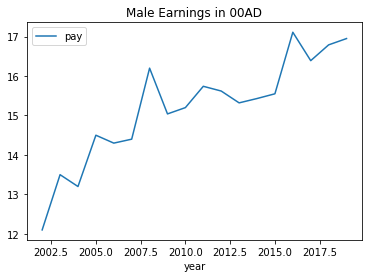

In [99]:
# Some time series for buroughs
np.random.seed(1)
boroughs = np.random.choice(earnings_cln["area_code"], size = 5, replace = False)

for borough in boroughs:

  # fig, ax = plt.subplots(figsize=(8,6))
  # for label, df in earnings_cln.loc[np.logical_and(earnings_cln["pay_type"] == "Hourly", earnings_cln["area_code"] == borough), :].groupby("pay_type"):
  #     pd.DataFrame(df).plot(x = "year", y = "pay", ax=ax, label=label)
  # plt.legend()

  earnings_cln.loc[np.logical_and.reduce(
      (earnings_cln["identity"] == "Male", earnings_cln["pay_type"] == "Hourly", earnings_cln["area_code"] == borough)
      ), :].plot(x = "year", y = "pay", title = f"Male Earnings in {borough}")